In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AQ_Data.csv', encoding='latin1')
df

,City,Date,NO2,NH3,CO,O3,AQI,Zone
0,Ahmedabad,28-06-2016,28.12,0.00,9.81,39.26,30.018868,Green Zone - Safe air quality: Air quality is ...
1,Ahmedabad,29-06-2016,31.82,0.00,10.45,28.05,15.084906,Green Zone - Safe air quality: Air quality is ...
2,Ahmedabad,30-06-2016,15.99,0.00,10.41,23.76,9.537736,Green Zone - Safe air quality: Air quality is ...
3,Ahmedabad,01-07-2016,10.11,0.00,9.39,16.42,7.066038,Green Zone - Safe air quality: Air quality is ...
4,Ahmedabad,02-07-2016,7.49,0.00,9.04,14.27,6.150943,Green Zone - Safe air quality: Air quality is ...
...,...,...,...,...,...,...,...,...
23159,Visakhapatnam,27-06-2020,25.06,12.47,0.47,23.30,24.584906,Green Zone - Safe air quality: Air quality is ...
23160,Visakhapatnam,28-06-2020,26.06,11.99,0.52,30.14,27.858491,Green Zone - Safe air quality: Air quality is ...
23161,Visakhapatnam,29-06-2020,29.53,10.71,0.48,30.96,27.603774,Green Zone - Safe air quality: Air quality is ...
23162,Visakhapatnam,30-06-2020,29.26,10.03,0.52,28.30,25.330189,Green Zone - Safe air quality: Air quality is ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23164 entries, 0 to 23163
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    23164 non-null  object 
 1   Date    23164 non-null  object 
 2   NO2     23164 non-null  float64
 3   NH3     23164 non-null  float64
 4   CO      23164 non-null  float64
 5   O3      23164 non-null  float64
 6   AQI     23164 non-null  float64
 7   Zone    23164 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,NO2,NH3,CO,O3,AQI
count,23164.000000,23164.000000,23164.000000,23164.000000,23164.000000
mean,29.373713,18.206559,2.181228,34.992410,33.243992
std,24.651393,24.913238,6.748154,21.634154,40.925571
min,0.010000,0.000000,0.000000,0.010000,0.000000
25%,12.410000,1.120000,0.590000,19.407500,11.707547
50%,22.695000,11.545000,0.920000,31.330000,21.405660
75%,38.670000,25.582500,1.440000,46.110000,36.481132
max,362.210000,352.890000,175.810000,257.730000,401.680588


In [ ]:
df.dtypes

City     object
Date     object
NO2     float64
NH3     float64
CO      float64
O3      float64
AQI     float64
Zone     object
dtype: object

In [ ]:
df.isna().sum()

City    0
Date    0
NO2     0
NH3     0
CO      0
O3      0
AQI     0
Zone    0
dtype: int64

In [ ]:
df.drop({'City','Date'},axis = 1,inplace = True)
df

,NO2,NH3,CO,O3,AQI,Zone
0,28.12,0.00,9.81,39.26,30.018868,Green Zone - Safe air quality: Air quality is ...
1,31.82,0.00,10.45,28.05,15.084906,Green Zone - Safe air quality: Air quality is ...
2,15.99,0.00,10.41,23.76,9.537736,Green Zone - Safe air quality: Air quality is ...
3,10.11,0.00,9.39,16.42,7.066038,Green Zone - Safe air quality: Air quality is ...
4,7.49,0.00,9.04,14.27,6.150943,Green Zone - Safe air quality: Air quality is ...
...,...,...,...,...,...,...
23159,25.06,12.47,0.47,23.30,24.584906,Green Zone - Safe air quality: Air quality is ...
23160,26.06,11.99,0.52,30.14,27.858491,Green Zone - Safe air quality: Air quality is ...
23161,29.53,10.71,0.48,30.96,27.603774,Green Zone - Safe air quality: Air quality is ...
23162,29.26,10.03,0.52,28.30,25.330189,Green Zone - Safe air quality: Air quality is ...


In [ ]:
from sklearn.model_selection import train_test_split

data1,test1 = train_test_split(df,test_size = 0.30, random_state = 42)

In [ ]:
test1.to_csv('Air_data.csv')

<Axes: >

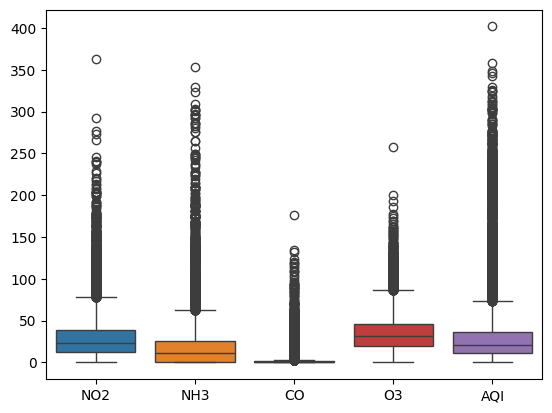

In [ ]:
sns.boxplot(df)

In [ ]:
import pandas as pd
import numpy as np

def IQR(df, x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    IQR = q3 - q1
    max_limit = q3 + 1.5 * IQR
    min_limit = q1 - 1.5 * IQR
    df_skew_new = pd.DataFrame(np.where(df[x] > max_limit, max_limit, np.where(df[x] < min_limit, min_limit, df[x])), columns=[x])
    return df_skew_new


df['NO2'] = IQR(df, 'NO2')['NO2']
df['O3'] = IQR(df, 'O3')['O3']
df['NH3'] = IQR(df, 'NH3')['NH3']
df['CO'] = IQR(df, 'CO')['CO']
df['AQI'] = IQR(df, 'AQI')['AQI']




<Axes: >

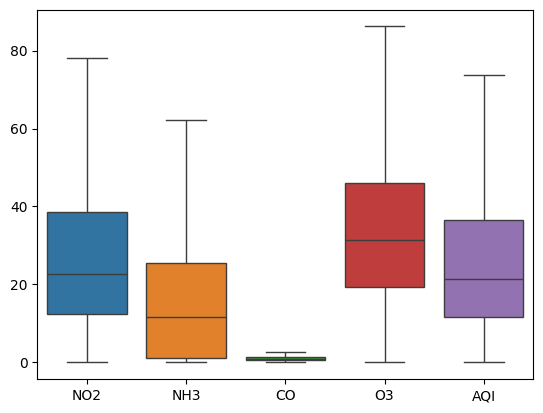

In [ ]:
sns.boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

data,test = train_test_split(df,test_size = 0.30, random_state = 42)

In [ ]:
test.to_csv('AQI_Pred.csv')

In [ ]:
df['Zone'].value_counts()

Zone
Green Zone - Safe air quality: Air quality is currently within safe limits. Enjoy outdoor activities!                                              21794
Orange Zone - Moderate air quality: Air quality is moderate. Be cautious for prolonged exposure outdoors, especially for sensitive individuals.      856
Red Zone - Unhealthy air quality: Air quality is currently unhealthy. Avoid outdoor activities and stay indoors.                                     514
Name: count, dtype: int64

In [ ]:
x = df.drop(['Zone'],axis = 1)
y = df['Zone']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
y_resampled.value_counts()

Zone
Green Zone - Safe air quality: Air quality is currently within safe limits. Enjoy outdoor activities!                                              21794
Orange Zone - Moderate air quality: Air quality is moderate. Be cautious for prolonged exposure outdoors, especially for sensitive individuals.    21794
Red Zone - Unhealthy air quality: Air quality is currently unhealthy. Avoid outdoor activities and stay indoors.                                   21794
Name: count, dtype: int64

In [ ]:


x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()

mod = [knn,dtc,rfc,lda]

In [ ]:
for i in mod:
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print('\n')
  print(i,':')
  print("Accuracy Score:", accuracy)
  print(report)




KNeighborsClassifier() :
Accuracy Score: 0.9184297731328065
                                                                                                                                                 precision    recall  f1-score   support

                                          Green Zone - Safe air quality: Air quality is currently within safe limits. Enjoy outdoor activities!       1.00      0.96      0.98      6427
Orange Zone - Moderate air quality: Air quality is moderate. Be cautious for prolonged exposure outdoors, especially for sensitive individuals.       0.89      0.88      0.88      6699
                               Red Zone - Unhealthy air quality: Air quality is currently unhealthy. Avoid outdoor activities and stay indoors.       0.88      0.92      0.90      6489

                                                                                                                                       accuracy                           0.92     19615
           

In [ ]:
import joblib

joblib.dump(rfc, 'rfc_model.pkl')

['rfc_model.pkl']